## Problem Statement
The objective of this project is to predict the fare amount for the taxi ride given the pickup and drop off locations

### Exploratory Data Analysis
- Exploratory data analysis is the first step where we explore and undrstand the data.
- In this section, we will load the data into our analysis environment and explore its properties. 
- EDA is one of the most important phases in the whol workflow and can help with not just understanding the dataset, but also in presenting certain fine points that can be usefulin the coming steps

### Import libraries


In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('ignore')

# data visualisation and manipulation

import os                        #getting access to input files
import pandas as pd              # Importing pandas for performing EDA
import numpy as np               # Importing numpy for Linear Algebric operations
import matplotlib.pyplot as plt  # Importing for Data Visualization
%matplotlib inline
from matplotlib import style
from scipy import stats
from collections import Counter
import seaborn as sns            # Importing for Data Visualization
plt.style.use('seaborn-whitegrid')

# configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

# import the necessary modelling algos.

from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV  

#evaluation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


### Load dataset
We begin with loading the train_cab.csv and test.csv and checking the shape of loaded dataframe

In [2]:
train_cab = pd.read_csv("C:/python/project cab fare/train_cab.csv")
test_cab = pd.read_csv ("C:/python/project cab fare/test.csv")

In [4]:
#Shape of the train dataset
train_cab.shape

(16067, 7)

In [5]:
#Shape of the test dataset
test_cab.shape

(9914, 6)

In the train dataset there are 16067 observations and 7 variables using which we have to predict the cab fare amount for the test data having 9914 observations and 6 variables

#### Checking the head of the dataframes
Lets check the top few rows to see how the data looks. We use the head() utility from pandas for the same to get the output

In [6]:
#look at the data
train_cab.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


### The details of data attributes in the dataset are as follows:
1. pickup_datetime - timestamp value indicating when the cab ride started.
2. pickup_longitude - float for longitude coordinate of where the cab ride started.
3. pickup_latitude - float for latitude coordinate of where the cab ride started.
4. dropoff_longitude - float for longitude coordinate of where the cab ride ended.
5. dropoff_latitude - float for latitude coordinate of where the cab ride ended.
6. passenger_count - an integer indicating the number of passengers in the cab ride.

In [7]:
test_cab.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


- Well, we see fare amount, pickup_datetime and latitude and longitude information. Let's take look into each of the following features. But, we need to check what data types pandas has inferred and if any of the attributes require type conversions. The following snippet helps us check the data types of all attributes

In [8]:
### check datatypes
train_cab.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

### Findings:
1. The attribute datetime would require type conversion from object (or String type) to timestamp

2. Tha attribute fare_amount is inferred as object by pandas, and they would require conversion to numeric for proper understanding

#### Descriptive statistics


In [9]:
#check statistics of the features 
train_cab.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


### Findings:
There are 7 variables in the dataset.

From the summary of the dataset, we can see:

1. The minimal fare_amount is negative. maximum is USD 54,343 and median is USD 8.50, As this does not seem to be realistic, I will drop the negative values from the dataset.
2. Some of the minimum and maximum longitude/lattitude coordinates are way off.Latitudes range should be brought within a set boundaries
3. Min passenger count is 0 and max is 208, both seem erroroneus. Passenger count should not exceed 6(even if we consider SUV)

In [10]:
# check datatypes
test_cab.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [11]:
#check statistics of the features 
test_cab.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


## Data Pre-Processing

In [12]:
#Convert fare_amount from object to numeric
train_cab["fare_amount"] = pd.to_numeric(train_cab["fare_amount"],errors = "coerce")  
#Using errors=’coerce’. It will replace all non-numeric values with NaN.

In [13]:
train_cab.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [14]:
# Here pickup_datetime variable is in object so we need to change its data type to datetime
train_cab['pickup_datetime'] =  pd.to_datetime(train_cab['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC',errors='coerce')

In [15]:
### we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc

train_cab['year'] = train_cab['pickup_datetime'].dt.year
train_cab['Month'] = train_cab['pickup_datetime'].dt.month
train_cab['Date'] = train_cab['pickup_datetime'].dt.day
train_cab['Day'] = train_cab['pickup_datetime'].dt.dayofweek
train_cab['Hour'] = train_cab['pickup_datetime'].dt.hour
train_cab['Minute'] = train_cab['pickup_datetime'].dt.minute

In [16]:
train_cab.dtypes #Re-checking datatypes after conversion

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
year                        float64
Month                       float64
Date                        float64
Day                         float64
Hour                        float64
Minute                      float64
dtype: object

#### similarly, for test_cab dataset

In [17]:
test_cab["pickup_datetime"] = pd.to_datetime(test_cab["pickup_datetime"],format= "%Y-%m-%d %H:%M:%S UTC")

In [18]:
### we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc

test_cab['year'] = test_cab['pickup_datetime'].dt.year
test_cab['Month'] = test_cab['pickup_datetime'].dt.month
test_cab['Date'] = test_cab['pickup_datetime'].dt.day
test_cab['Day'] = test_cab['pickup_datetime'].dt.dayofweek
test_cab['Hour'] = test_cab['pickup_datetime'].dt.hour
test_cab['Minute'] = test_cab['pickup_datetime'].dt.minute

In [19]:
test_cab.dtypes #Re-checking test datatypes after conversion

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object

In [20]:
#removing datetime missing values rows
train_cab = train_cab.drop(train_cab[train_cab['pickup_datetime'].isnull()].index, axis=0)
print(train_cab.shape)

(16066, 13)


In [21]:
train_cab["passenger_count"].describe()

count    16011.000000
mean         2.625171
std         60.846021
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

- We can see maximum number of passanger count is 5345 and minimum is 0, which is actually not possible. So reducing the passenger count to 6 (even if we consider the SUV)

In [22]:
# removing the values with passenger count >6
train_cab = train_cab.drop(train_cab[train_cab["passenger_count"]> 6 ].index, axis=0)

# Also removing the values with passenger count of 0
train_cab = train_cab.drop(train_cab[train_cab["passenger_count"] == 0 ].index, axis=0)

In [23]:
train_cab["passenger_count"].describe()

count    15934.000000
mean         1.649581
std          1.265943
min          0.120000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

#### we can see min passenger count is 0.12 which is not possible

In [24]:
train_cab = train_cab.drop(train_cab[train_cab["passenger_count"] == 0.12 ].index, axis=0)
train_cab.shape

(15988, 13)

In [25]:
train_cab['passenger_count'].describe()

count    15933.000000
mean         1.649677
std          1.265925
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

#### Next checking the Fare Amount variable :

In [32]:
train_cab['fare_amount'].describe()

count    15957.000000
mean        11.373641
std         10.807367
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max        453.000000
Name: fare_amount, dtype: float64

In [27]:
##finding decending order of fare to get to know whether the outliers are present or not
train_cab["fare_amount"].sort_values(ascending=False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 15988, dtype: float64

#### The fare amount column is having some negative values, Let's Check it

In [28]:
print(Counter(train_cab['fare_amount']<0))
print(Counter(train_cab['fare_amount']>1000))

Counter({False: 15985, True: 3})
Counter({False: 15986, True: 2})


#### Also remove the row where fare amount is zero

In [29]:
train_cab = train_cab.drop(train_cab[train_cab["fare_amount"]<1].index, axis=0)
train_cab.shape

(15983, 13)

#### Now we can see that there is a huge difference in 1st 2nd and 3rd position in decending order of fare amount
- so we will remove the rows having fare amounting more that 454 as considering them as outliers

In [30]:
train_cab = train_cab.drop(train_cab[train_cab["fare_amount"]> 1000 ].index, axis=0)
train_cab.shape

(15981, 13)

In [33]:
train_cab["fare_amount"].describe()

count    15957.000000
mean        11.373641
std         10.807367
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max        453.000000
Name: fare_amount, dtype: float64

### Now checking the (pickup & dropoff) lattitude and longitude :

#### Lattitude-> (-90 to 90)
#### Longitude-> (-180 to 180)

- we need to drop the rows having  pickup lattitute and longitute out the range mentioned above

In [35]:
train_cab[(train_cab['pickup_latitude']<-90) | (train_cab['pickup_latitude']>90)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
5686,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1.0,2011.0,7.0,30.0,5.0,11.0,15.0


In [36]:
#Hence dropping one value of >90
train_cab = train_cab.drop((train_cab[train_cab['pickup_latitude']>90]).index, axis=0)

#### checking if pickup_longitude values out of the range

In [37]:
train_cab[(train_cab['pickup_longitude']<-180) |(train_cab['pickup_longitude']>180)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


#### checking if dropoff_latitude values out of the range

In [38]:
train_cab[(train_cab['dropoff_latitude']<-90) | (train_cab['dropoff_latitude']>90)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


#### checking if dropoff_longitude values out of the range

In [39]:
train_cab[(train_cab['dropoff_longitude']<-180) | (train_cab['dropoff_longitude']>180)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [40]:
train_cab.shape

(15980, 13)

## Missing Value Analysis
In statistics, missing data, or missing values, occur when no data value is stored for the variable in an observation. Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data.

In [41]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(train_cab.isnull().sum())
#Reset index
missing_val = missing_val.reset_index()
#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(train_cab))*100
#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
missing_val

,Variables,Missing_percentage
0,passenger_count,0.344180
1,fare_amount,0.150188
2,pickup_datetime,0.000000
3,pickup_longitude,0.000000
4,pickup_latitude,0.000000
5,dropoff_longitude,0.000000
6,dropoff_latitude,0.000000
7,year,0.000000
8,Month,0.000000
9,Date,0.000000


### Findings:
As we can see that in train dataset we find missing values in

1.passenger_count-55 (0.34%) and

2.fare_amount- 25 (0.15%).

- As the dataset is small with 16k observations, if we delete the missing values, it may probably has effect on the model being trained, so here we will impute the missing values for fare_amount using median as median is not affected by outliers
- for passenger_count we will use mode

In [42]:
train_cab['passenger_count'] = train_cab['passenger_count'].fillna(train_cab['passenger_count'].mode()[0])

In [43]:
train_cab['fare_amount'] = train_cab['fare_amount'].fillna(train_cab['fare_amount'].median())

In [44]:
train_cab.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

- all missing vlaue is imputed

In [45]:
test_cab.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

#### test_cab does not contain missing values

### Calculating distance based on the given coordinates :

- As we know that we have given pickup longitute and latitude values and same for dropoff. 
- So we need to calculate the distance Using the haversine formula and we will create a new variable called distance


In [46]:
from math import cos, asin, sqrt, pi

def haversine(a):
    lat1=a[0]
    lon1=a[1]
    lat2=a[2]
    lon2=a[3]
    
    p = pi/180
    
    b = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    km = 12742 * asin(sqrt(b)) 
    return km

In [47]:
train_cab['distance'] = train_cab[['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']].apply(haversine,axis = 1)

In [48]:
train_cab.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


##### similarly, for test_cab

In [49]:
test_cab['distance'] = test_cab[['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']].apply(haversine,axis = 1)

In [50]:
test_cab.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


- finding decending order of distance to get to know whether the outliers are presented or not


In [51]:
train_cab['distance'].sort_values(ascending=False).head(30)

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
13340    8666.613646
10215    8666.584706
4597     8666.566030
10458    8665.976222
10672    8665.702390
10488    8665.555634
1260     8665.268588
4278     8665.223767
6188     8664.191488
12983    8664.131808
6302     8663.039123
12705    8661.362152
14197    8657.136619
15783    8656.714168
15749    6028.926779
2280     6026.494216
5864     5420.988959
7014     4447.086698
10710     129.950482
14536     129.560455
11619     127.509261
12228     123.561157
5663      101.094619
1684       99.771579
3075       97.985088
Name: distance, dtype: float64

##### As we can see that top 23 values in the distance variable are very high It means more than 8000 Kms distance they have travelled Also just after 23rd value from the top, the distance goes down to 129, which means these values are showing some outliers We need to remove these values

In [52]:
Counter(train_cab['distance'] == 0)

Counter({False: 15524, True: 456})

In [53]:
Counter(test_cab['distance'] == 0)

Counter({False: 9829, True: 85})

In [54]:
###we will remove the rows whose distance value is zero

train_cab = train_cab.drop(train_cab[train_cab['distance']== 0].index, axis=0)
train_cab.shape

(15524, 14)

In [55]:
#we will remove the rows whose distance values is very high which is more than 129kms
train_cab = train_cab.drop(train_cab[train_cab['distance'] > 130 ].index, axis=0)
train_cab.shape

(15501, 14)

In [56]:
train_cab.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


- Now we have splitted the pickup date time variable into different varaibles like month, year, day etc so now we dont need to have that pickup_Date variable now. Hence we can drop that 
- Also we have created distance using pickup and drop longitudes and latitudes so we will also drop pickup and drop longitudes and latitudes variables.

In [57]:
drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude','Minute']
train_cab = train_cab.drop(drop, axis = 1)

In [58]:
train_cab.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,4.5,1.0,2009.0,6.0,15.0,0.0,17.0,1.030764
1,16.9,1.0,2010.0,1.0,5.0,1.0,16.0,8.450134
2,5.7,2.0,2011.0,8.0,18.0,3.0,0.0,1.389525
3,7.7,1.0,2012.0,4.0,21.0,5.0,4.0,2.799270
4,5.3,1.0,2010.0,3.0,9.0,1.0,7.0,1.999157


- changing datatyoe for better understanding

In [59]:
train_cab['passenger_count'] = train_cab['passenger_count'].astype('int64')
train_cab['year'] = train_cab['year'].astype('int64')
train_cab['Month'] = train_cab['Month'].astype('int64')
train_cab['Date'] = train_cab['Date'].astype('int64')
train_cab['Day'] = train_cab['Day'].astype('int64')
train_cab['Hour'] = train_cab['Hour'].astype('int64')

In [60]:
train_cab.dtypes

fare_amount        float64
passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

#### similarly, for test_cab dataset

In [61]:
drop_test = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude','Minute']
test_cab = test_cab.drop(drop_test, axis = 1)

In [62]:
test_cab.head()

,passenger_count,year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323259
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301


In [63]:
test_cab.dtypes

passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

- saving one copy of train_cab dataset

In [64]:
df=train_cab.copy()

### Outlier Analysis
While exploring and learning about any dataset, it is imperative we check for extreme and unlikely values. Though we handle missing and incorrect information while preprocessing the dataset, outliers are usually caught during EDA. Outliers can serverely and adversely impact the downstream steps like modelling and the results. We usually utilize boxplots to check outliers in the data. In the following snippet, we analyze outliers for numeric attributes

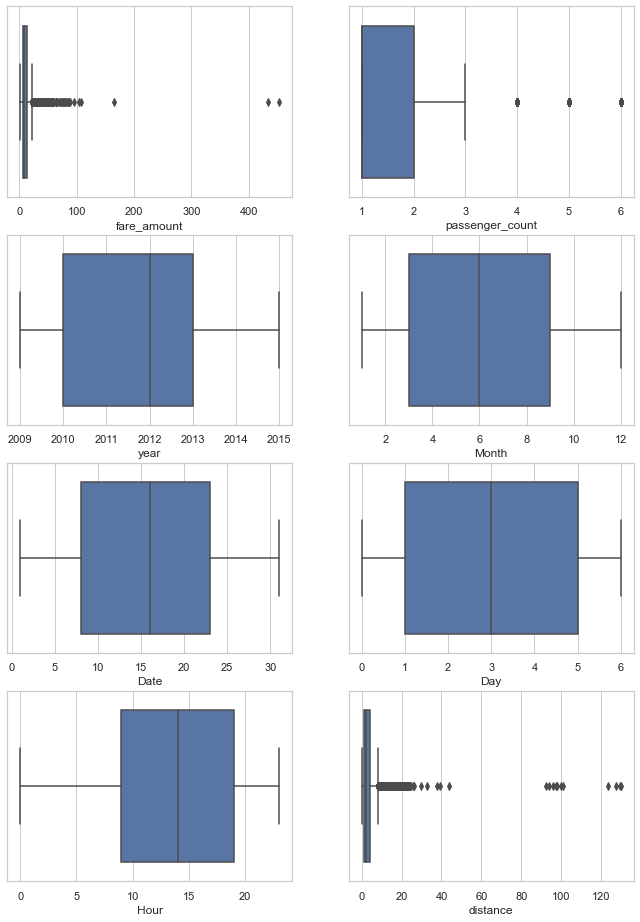

In [65]:
f, axes = plt.subplots(4,2 ,figsize = (10,15))
sns.boxplot(df['fare_amount'] , ax=axes[0,0])
sns.boxplot(df['passenger_count'], ax=axes[0,1])
sns.boxplot(df['year'], ax=axes[1,0])
sns.boxplot(df['Month'], ax=axes[1,1])
sns.boxplot(df['Date'], ax=axes[2,0])
sns.boxplot(df['Day'], ax=axes[2,1])
sns.boxplot(df['Hour'], ax=axes[3,0])
sns.boxplot(df['distance'], ax=axes[3,1])

- In Box plots analysis of individual features, we can clearly observe from these boxplots that, not every feature contains outliers and many of them even have very few outliers. We have only 16k data-points and after removing the outliers, the data gets decreased by almost 15%. So, dropping the outliers is probably not the best idea. Instead we will fill them with NA, that means we have created ‘missing values’ in place of outliers within the data. Now, we can treat these outliers like missing values and impute them using standard imputation techniques. In our case, we use Median imputation to impute these missing values.

In [66]:
##Detect and delete outliers from data
def outliers_analysis(df): 
    for i in df.columns:
        print(i)
        q75, q25 = np.percentile(df.loc[:,i], [75 ,25])
        iqr = q75 - q25

        min = q25 - (iqr*1.5)
        max = q75 + (iqr*1.5)
        print(min)
        print(max)
    
        df = df.drop(df[df.loc[:,i] < min].index)
        df = df.drop(df[df.loc[:,i] > max].index)
    return(df)

In [67]:
def eliminate_rows_with_zero_value(df):
    df= df[df!= 0]
    df=df.fillna(df.median())
    return(df)

In [68]:
df.shape

(15501, 8)

fare_amount
-3.75
22.25
passenger_count
-0.5
3.5
year
2005.5
2017.5
Month
-6.0
18.0
Date
-14.5
45.5
Day
-5.0
11.0
Hour
-6.0
34.0
distance
-1.9387461073604002
6.485872685656572


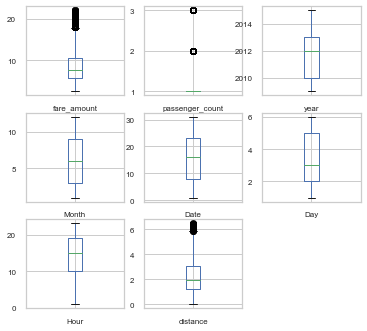

In [69]:
train_cab = outliers_analysis(train_cab)
train_cab = eliminate_rows_with_zero_value(train_cab)

train_cab.plot(kind='box', subplots=True, layout=(8,3), sharex=False, sharey=False, fontsize=8)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top= 3,wspace=0.2, hspace=0.2)
plt.show()

#### Outlier analysis in test data

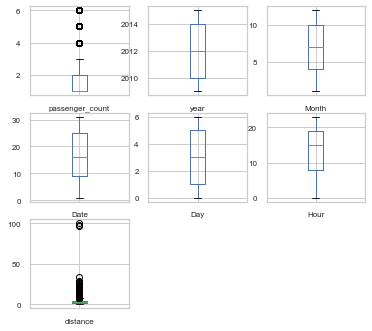

In [70]:
test_cab.plot(kind='box', subplots=True, layout=(8,3), sharex=False, sharey=False, fontsize=8)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top= 3,wspace=0.2, hspace=0.2)
plt.show()

In [71]:
test_cab = outliers_analysis(test_cab)
test_cab = eliminate_rows_with_zero_value(test_cab)

passenger_count
-0.5
3.5
year
2004.0
2020.0
Month
-5.0
19.0
Date
-13.5
46.5
Day
-5.0
11.0
Hour
-8.5
35.5
distance
-2.784466830872435
8.081630653894486


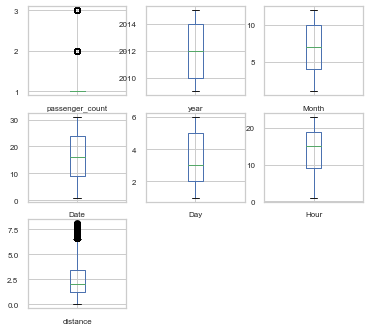

In [72]:
test_cab.plot(kind='box', subplots=True, layout=(8,3), sharex=False, sharey=False, fontsize=8)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top= 3,wspace=0.2, hspace=0.2)
plt.show()

In [73]:
train_cab=df

### Data Visualisation
Data visualisation helps us to get better insights of the data. By visualising data, we can identify areas that need attention or improvement and also clarifies which factors influence fare of the cab and how the resources are used to determine it.

#### Visualization of following:
1. Number of Passengers effects the the fare
2. Pickup date and time effects the fare
3. Day of the week does effects the fare
4. Distance effects the fare

### Univariate analysis
Univariate analysis is the simplest form of data analysis where the data being analysed contains only one variable. Since it's a single variable it doesn’t deal with causes or relationships. The main purpose of univariate analysis is to describe the data and find patterns that exist within it. So, Lets have a look at histogram plot, to identify the characteristic of the features and the data.

### Bivariate analysis
In bivariate analysis, we will look at the relationship between target variable and predictor.

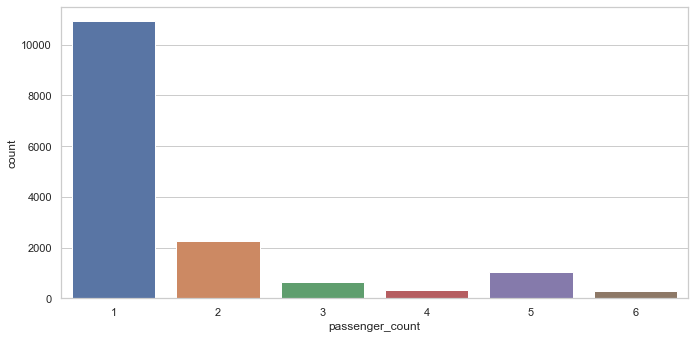

In [74]:
# Count plot on passenger count
plt.figure(figsize=(10,5))
sns.countplot(x="passenger_count", data=train_cab)

#### Relationship beetween number of passengers and Fare

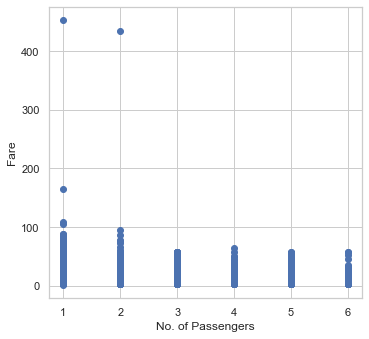

In [283]:
plt.figure(figsize=(5,5))
plt.scatter(train_cab['passenger_count'], train_cab['fare_amount'])
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')
plt.show()

### Findings :
By seeing the above plots we can easily conclude that:

1. single travelling passengers are most frequent travellers.
2. At the sametime we can also conclude that highest Fare are coming from single & double travelling passengers.

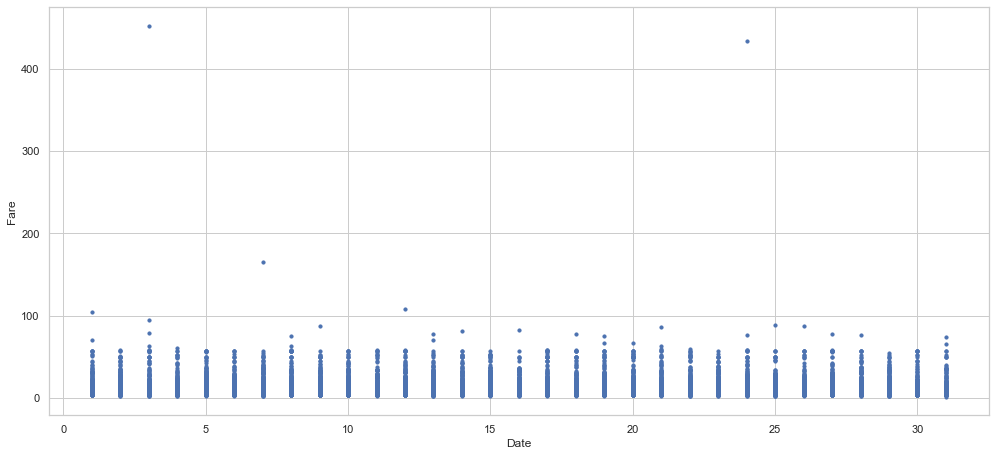

In [284]:
#Relationship between date and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train_cab['Date'], y=train_cab['fare_amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

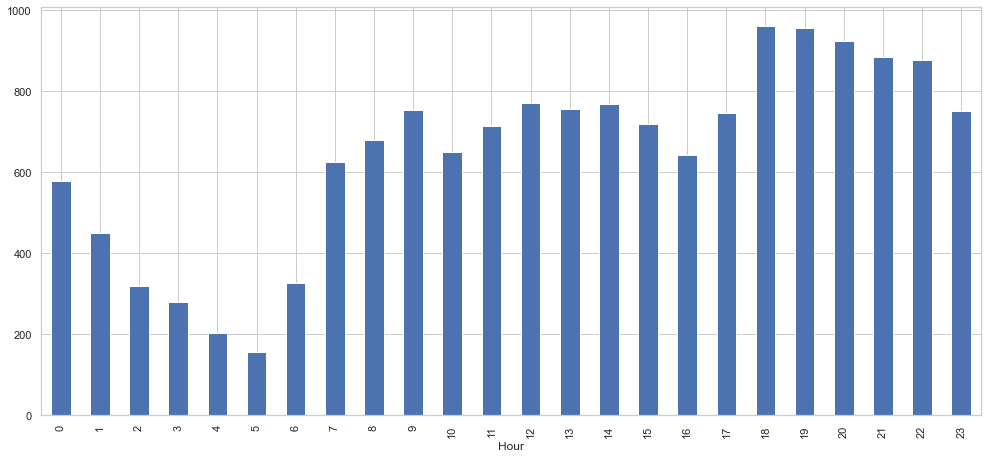

In [285]:
plt.figure(figsize=(15,7))
train_cab.groupby(train_cab["Hour"])['Hour'].count().plot(kind="bar")
plt.show()

#### Lowest cabs at 5 AM and highest at and around 7 PM i.e the office rush hours

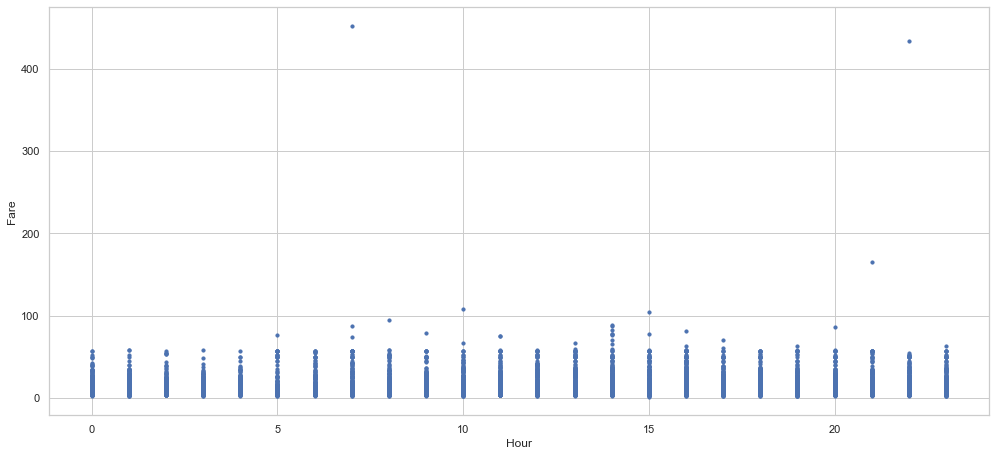

In [286]:
#Relationship between Time and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train_cab['Hour'], y=train_cab['fare_amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

#### From the above plot We can observe that the cabs taken at 7 am and 23 Pm are the costliest. Hence we can assume that cabs taken early in morning and late at night are costliest

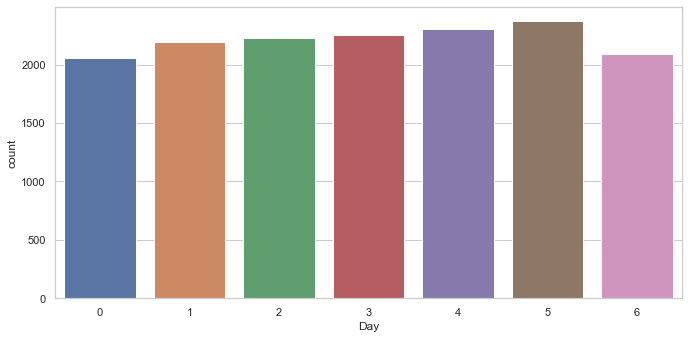

In [287]:
#impact of Day on the number of cab rides
plt.figure(figsize=(10,5))
sns.countplot(x="Day", data=train_cab)

#### Observation : The day of the week does not seem to have much influence on the number of cabs ride

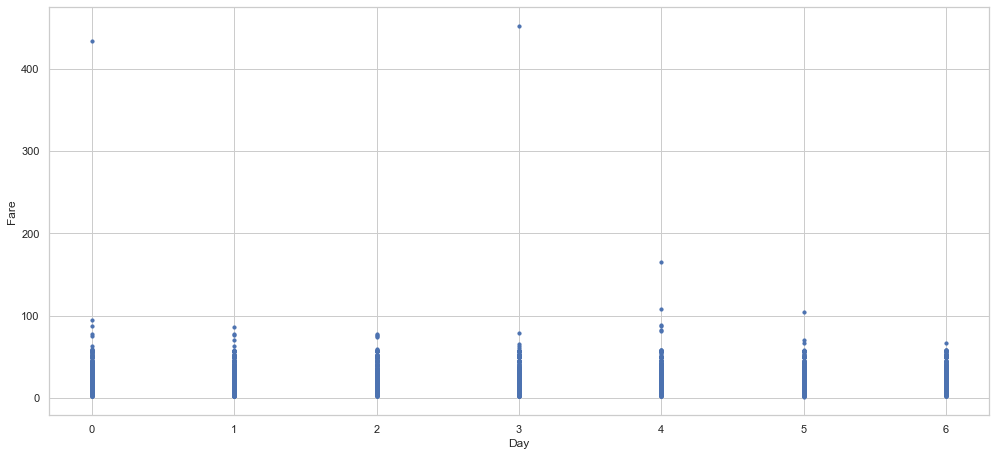

In [288]:
#Relationships between day and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train_cab['Day'], y=train_cab['fare_amount'], s=10)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()

- The highest fares seem to be on a Sunday, Monday and Thursday, and the low on Tuesday and Saturday. May be due to low demand of the cabs on saturdays the cab fare is low and high demand of cabs on sunday and monday shows the high fare prices

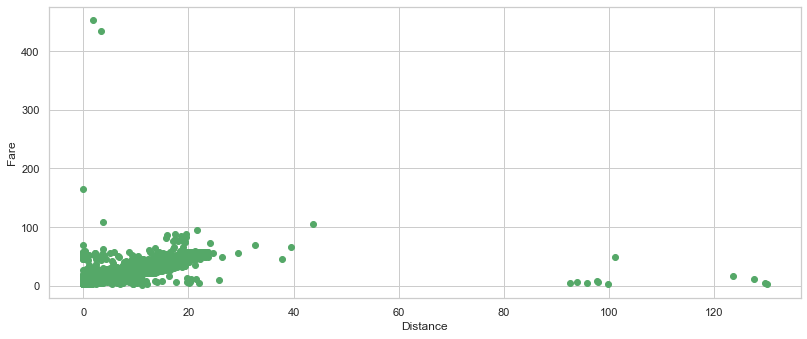

In [289]:
#Relationship between distance and fare 
plt.figure(figsize=(12,5))
plt.scatter(x = train_cab['distance'],y = train_cab['fare_amount'],c = "g")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

### Correlation Analysis
Correlation helps us understand relationships between different attributes of the data. Since we have to predict the fare_amount in this project (Focus is on forecasting), so correlations helps us understand and exploit relationships to build better models

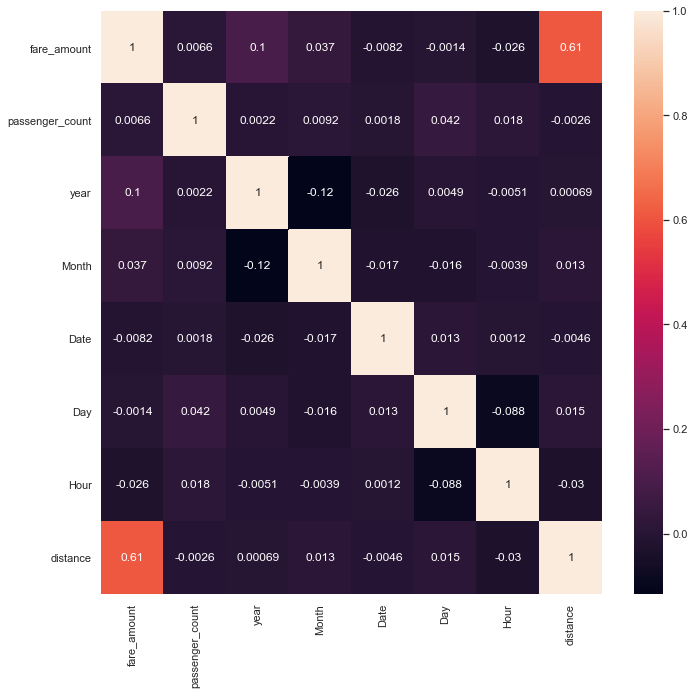

In [290]:
plt.figure(figsize=(10,10))
corr = train_cab.corr()
sns.heatmap(corr, annot= True)

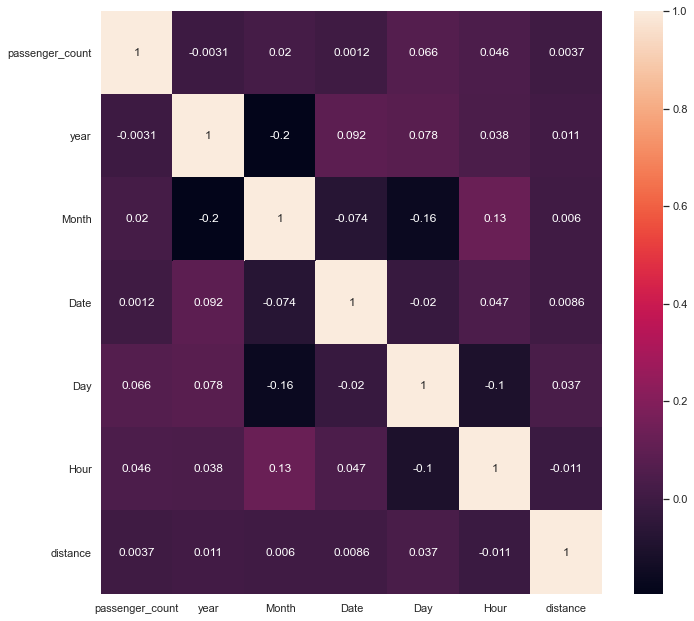

In [291]:
plt.figure(figsize=(10,10))
corr_test = test_cab.corr()
sns.heatmap(corr_test, annot= True)

1. The value for collinearity is between -1 to 1. So, any value close to -1/1 will result in high collinearity.
2. It seems all right in our train and test data the situations nothing is more than 0.4 in positive direction and nothing is less than -0.1 in negative direction.
Therefore the datasets are free from collinearity problem

### Feature Scaling
Using the raw values as input features might make models biased toward features having really high magnitude values. These models are typically sensitive to the magnitude or scale of features like linear or logistic regression.Therefore it is recommended to normalize and scale down the features with feature scaling. Here we use Normalisation technique as the train & test _dataset are not normally distributed

#### Normalisation
Normalization rescales the values into a range of [0,1]. This might be useful in some cases where all parameters need to have the same positive scale.

fare_amount


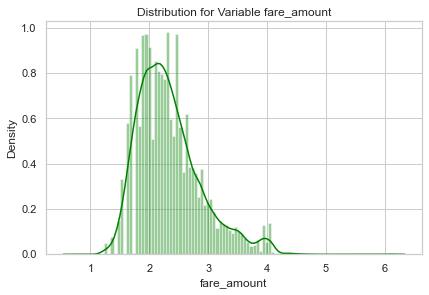

distance


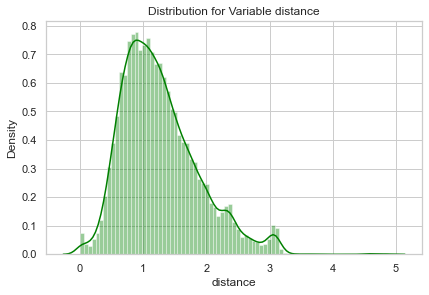

In [140]:
#Normality check of training data is uniformly distributed or not-

for i in [ 'fare_amount','distance']:
    print(i)
    sns.distplot(train_cab[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [87]:
#since skewness of distance variable on right is high, apply log transform to reduce the skewness-
train_cab['distance'] = np.log1p(train_cab['distance'])
train_cab['fare_amount'] = np.log1p(train_cab['fare_amount'])

distance


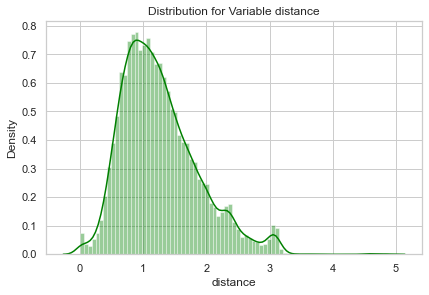

In [88]:
for i in ['distance']:
    print(i)
    sns.distplot(train_cab[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

#### Here we can see bell shaped distribution. Hence our continous variables are now normally distributed,we will use not use any Feature Scalling technique. i.e, Normalization or Standarization for our training data

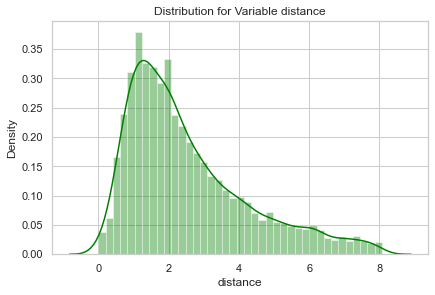

In [89]:
#Normality check for test data is uniformly distributed or not-

sns.distplot(test_cab['distance'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

In [90]:
#since skewness of distance variable is high, apply log transform to reduce the skewness-
test_cab['distance'] = np.log1p(test_cab['distance'])

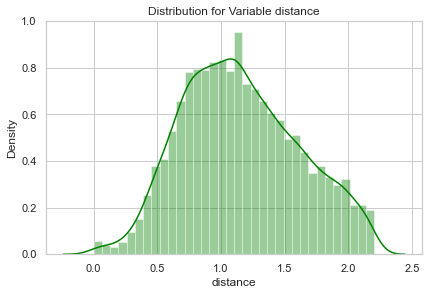

In [91]:
#rechecking the distribution for distance
sns.distplot(test_cab['distance'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

### dummy variable

In [120]:
train_cab['year'] = train_cab['year'].astype(object)
train_cab = pd.get_dummies(train_cab,  columns=['year'],drop_first=True)
train_cab.head()

In [154]:
test_cab['year'] = test_cab['year'].astype(object)
test_cab = pd.get_dummies(test_cab,  columns=['year'],drop_first=True)
test_cab.head()

,passenger_count,Month,Date,Day,Hour,distance,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015
0,1,1,27,1.0,13.0,1.200946,0,0,0,0,0,1
1,1,1,27,1.0,13.0,1.231205,0,0,0,0,0,1
2,1,10,8,5.0,11.0,0.481579,0,1,0,0,0,0
3,1,12,1,5.0,21.0,1.085538,0,0,1,0,0,0
4,1,12,1,5.0,21.0,1.854312,0,0,1,0,0,0


- As we can see a bell shaped distribution. Hence our continous variables are now normally distributed,and scale of all features are also mostly in same range so no need to do standardization or normalization

## Evaluating Regression Models
Predictive performance can be measured by comparing Predictions of the models with real values of the target variables, and calculating some average error measure.

#### Root Mean Square Value
Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are, RMSE is a measure of how spread out these residuals are.In other words, it tells you how concentrated the data is around the line of best fit. Also, Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. So, RMSE becomes more useful when large errors are particularly undesirable. So, Root Mean Square value seems like a perfect choice for our problem at hand.

#### Mean Absolute Percentage Error (MAPE)
The mean absolute percentage error (MAPE), also known as mean absolute percentage deviation (MAPD), is a measure of prediction accuracy of a forecasting method in statistics, for example in trend estimation, also used as a loss function for regression problems in machine learning.


#### Splitting the data into train and validation sets

In [123]:
X = train_cab.drop('fare_amount',axis = 1)
y = train_cab.fare_amount

In [124]:
##train test split for further modelling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 12)

In [125]:
print("X_train :",X_train.shape) 
print('y_train :',y_train.shape)
print("X_test  :",X_test.shape)
print('y_test  :',y_test.shape)

X_train : (13175, 12)
y_train : (13175,)
X_test  : (2326, 12)
y_test  : (2326,)


#### Regression analysis
It is the process of investigating the relationships between dependent and independent variables. It is widely used for the predictive analysis, forecasting and time series analysis.The regression line is a straight line in this technique. The aim here is to minimize the error(sum of squared error for instance)

### Linear Regression

In [126]:
# Building model on top of training dataset
fit_LR = LinearRegression(normalize=True).fit(X_train , y_train)

In [127]:
#prediction on train data
pred_train_LR = fit_LR.predict(X_train)

In [128]:
#prediction on test data
pred_test_LR = fit_LR.predict(X_test)

In [129]:
##calculating RMSE for test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))

##calculating RMSE for train data
RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))

print("Root Mean Squared Error For Train data = "+str(RMSE_train_LR))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_LR))

Root Mean Squared Error For Train data = 0.27143760971920744
Root Mean Squared Error For Test data = 0.25347153025073893


In [130]:
#calculate R^2 for train data
r2_score(y_train, pred_train_LR)

0.7525676041075591

In [131]:
r2_score(y_test, pred_test_LR)

0.7799547350564948

### Decision Tree

- Decision trees are supervised learning algorithims, simple yet powerful in modeling non-linear relationships. Being a non-parametric model, the aim of this algorithim is to learn a model that can predict outcomes based on simple decision rules based on features.

In [132]:
#building model
fit_DT = DecisionTreeRegressor(max_depth=5).fit(X_train,y_train)

#prediction on train data
pred_train_DT = fit_DT.predict(X_train)

#prediction on test data
pred_test_DT = fit_DT.predict(X_test)

In [133]:
##calculating RMSE for train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))

##calculating RMSE for test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

print("Root Mean Squared Error For Training data = "+str(RMSE_train_DT))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_DT))

Root Mean Squared Error For Training data = 0.25291330158051056
Root Mean Squared Error For Test data = 0.25020207880215833


In [134]:
## R^2 calculation for train data
r2_score(y_train, pred_train_DT)

0.7851873474498362

In [135]:
## R^2 calculation for test data
r2_score(y_test, pred_test_DT)

0.7855947173733788

## Random Forest
- Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees

In [136]:
fit_RF = RandomForestRegressor(n_estimators=200).fit(X_train,y_train)

#prediction on train data
pred_train_RF = fit_RF.predict(X_train)

#prediction on test data
pred_test_RF = fit_RF.predict(X_test)

In [137]:
##calculating RMSE for train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))

##calculating RMSE for test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

print("Root Mean Squared Error For Training data = "+str(RMSE_train_RF))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_RF))

Root Mean Squared Error For Training data = 0.09517058733245498
Root Mean Squared Error For Test data = 0.24611759722680587


In [138]:
## calculate R^2 for train data
r2_score(y_train, pred_train_RF)

0.9695826051827818

In [139]:
#calculate R^2 for test data
r2_score(y_test, pred_test_RF)

0.7925377960746742

### Optimising the results with parameter tuning

In [150]:
##Random Search CV on Random Forest Model

RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(50,100,2))
depth = list(range(1,50,2))
max_features = [ "sqrt", "log2"]

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth,
             'max_features' : max_features
            }

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=21)
randomcv_rf = randomcv_rf.fit(X_train,y_train)
predictions_RRF = randomcv_rf.predict(X_test)

view_best_params_RRF = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_

predictions_RRF = best_model.predict(X_test)

#R^2
RRF_r2 = r2_score(y_test, predictions_RRF)
#Calculating RMSE
RRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_RRF))

print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_RRF)
print('R-squared = {:0.2}'.format(RRF_r2))
print('RMSE = ',RRF_rmse)

Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 88, 'max_features': 'sqrt', 'max_depth': 39}
R-squared = 0.8
RMSE =  0.24009313159689283


### Model Selection

- So, It is obvious from above model performance comparison table Random Forest performed better than other models comparatively on RMSE (Root Mean Square Error)

## Prediction of fare from provided test dataset :
We have already cleaned and processed our test dataset along with our training dataset. Hence we will be predicting using Randomized search CV for random forest model

In [157]:
#prediction
final_pred = best_model.predict(test_cab)

In [159]:
#taking antilog to convert fare_amount in the main form
final_pred = np.exp(final_pred)

In [161]:
test_cab['Predicted_fare'] = final_pred

In [164]:
test_cab.head()

,passenger_count,Month,Date,Day,Hour,distance,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,Predicted_fare
0,1,1,27,1.0,13.0,1.200946,0,0,0,0,0,1,11.105441
1,1,1,27,1.0,13.0,1.231205,0,0,0,0,0,1,10.895116
2,1,10,8,5.0,11.0,0.481579,0,1,0,0,0,0,5.495050
3,1,12,1,5.0,21.0,1.085538,0,0,1,0,0,0,9.459921
4,1,12,1,5.0,21.0,1.854312,0,0,1,0,0,0,16.134451


In [ ]:
test_cab.to_csv('test_pred.csv')